In [2]:
#Primero vamos a importar las librerías.
import tensorflow as tf
from tensorflow import keras as keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras. optimizers import Adam, RMSprop, SGD
from keras.regularizers import L1, L2, L1L2
import numpy as np


dataset= mnist.load_data()
(x_train, y_train), (x_test,y_test) = dataset #Son las variables separadas de los datos de entrenamiento y pruebas


#Ahora aplanamos las imágenes y convertimos en punto flotante
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)
x_trainv = x_train.astype('float32')
x_testv = x_test.astype('float32')

lr = 0.001  #learning rate
num_clases = 10
y_trainc = keras.utils.to_categorical(y_train, num_clases)
y_testc = keras.utils.to_categorical(y_test, num_clases)

#Ahora vayamos con la parte a) en ta tarea pasada traté de usar Adam y categorical cross entropy
#Pero no me salió :(.
#Llamemoslo experimento 1 (de 4)
exp1 = Sequential([
    Dense(30, activation='sigmoid', input_shape=(784,)),
    Dense(10,activation='softmax')
      ])
#modelo1.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=1e-3),metrics=['accuracy'])
exp1.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=lr), metrics=['accuracy'])
history = exp1.fit(x_trainv, y_trainc, batch_size = 10, epochs = 15, validation_data=(x_testv, y_testc))

11490434/11490434 [==============================] - 1s 0us/step
Epoch 1/15
6000/6000 [==============================] - 23s 4ms/step - loss: 0.7677 - accuracy: 0.7822 - val_loss: 0.5391 - val_accuracy: 0.8379
Epoch 2/15
6000/6000 [==============================] - 14s 2ms/step - loss: 0.5069 - accuracy: 0.8459 - val_loss: 0.4627 - val_accuracy: 0.8562
Epoch 3/15
6000/6000 [==============================] - 13s 2ms/step - loss: 0.4666 - accuracy: 0.8555 - val_loss: 0.4412 - val_accuracy: 0.8651
Epoch 4/15
6000/6000 [==============================] - 13s 2ms/step - loss: 0.4327 - accuracy: 0.8680 - val_loss: 0.3976 - val_accuracy: 0.8827
Epoch 5/15
6000/6000 [==============================] - 13s 2ms/step - loss: 0.4204 - accuracy: 0.8728 - val_loss: 0.4431 - val_accuracy: 0.8629
Epoch 6/15
6000/6000 [==============================] - 13s 2ms/step - loss: 0.4066 - accuracy: 0.8770 - val_loss: 0.3916 - val_accuracy: 0.8837
Epoch 7/15
6000/6000 [==============================] - 16s 3ms/s

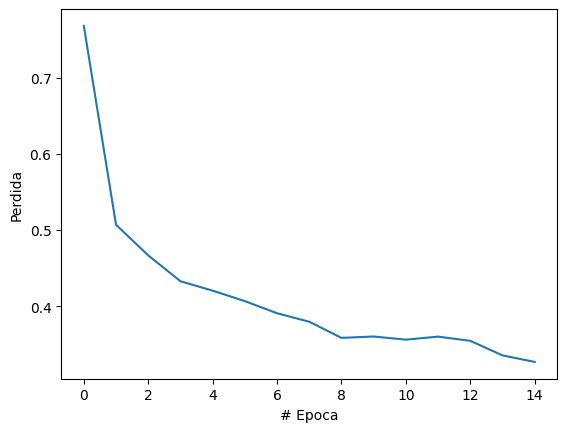

In [3]:
import matplotlib.pyplot as plt
from keras.callbacks import History

# Assuming you have a history object from a previous training session
plt.xlabel("# Epoca")
plt.ylabel("Perdida")
plt.plot(history.history["loss"])

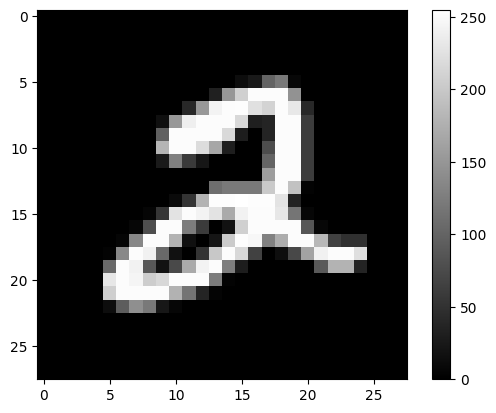

In [11]:
import matplotlib.pyplot as plt
image = x_train[5].reshape((28, 28))
plt.figure()
plt.imshow(image, cmap="gray")#número de imagen en el mnist
plt.colorbar()
plt.grid(False)
plt.show()

In [14]:
score = exp1.evaluate(x_testv, y_testc, verbose=1) #evaluar la eficiencia del modelo
print(score)
a=exp1.predict(x_testv) #predicción de la red entrenada
print(a.shape)
print(a[1])
print("resultado correcto:")
print(y_testc[1])


313/313 [==============================] - 1s 3ms/step - loss: 0.3106 - accuracy: 0.9069
[0.3106008470058441, 0.9068999886512756]
313/313 [==============================] - 1s 1ms/step
(10000, 10)
[1.0610824e-03 1.6631070e-04 9.8354828e-01 7.4955421e-03 2.4091875e-07
 5.7761068e-03 1.0935414e-03 4.8624945e-05 8.0985873e-04 4.5825377e-07]
resultado correcto:
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
